# Cluster Analysis

## Objective

After completing this lab you will be able to:
*   Understand & Perform clustering analysis on given datasets
*   Quantitatively describe the quality clusters' fit

## Introduction to cluster analysis

Cluster analysis is a popular machine learning (unsuppervised) approach used in data mining and exploratory data analysis. Its purpose is to discover groups in seemingly unstructured data.

### Example

Let’s begin with a real business situation to illustrate what cluster analysis actually does.

Your company sells a variety of products online, from high-end TVs to sports equipment and kitchen utensils. It’s a one-stop e-commerce shop. The Head of Marketing comes to you and says that they would like to tailor their marketing messages. Your budget is not big enough to go fully personalized by creating a message that is specific to each customer, but you do have the resources and manpower to create 3 - 5 different campaigns.

How do you solve this problem?

Here is where the cluster analysis comes in handy! You could use clustering algorithms to discover clusters (groups) in the customers' purchase data.

Here is the purchase records:
<div>
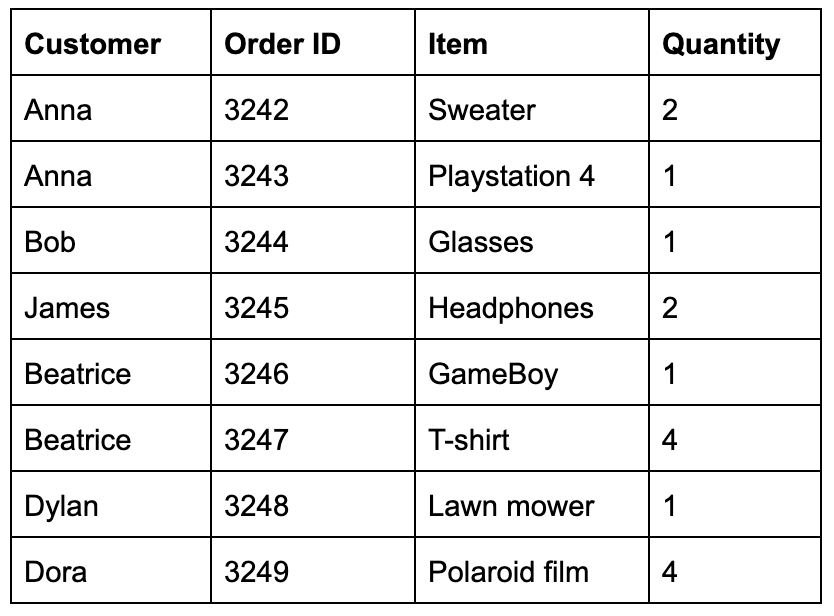
</div>

After applying clustering analysis, you could determine that customers fall into three different groups based on what thay purchased:

<div>
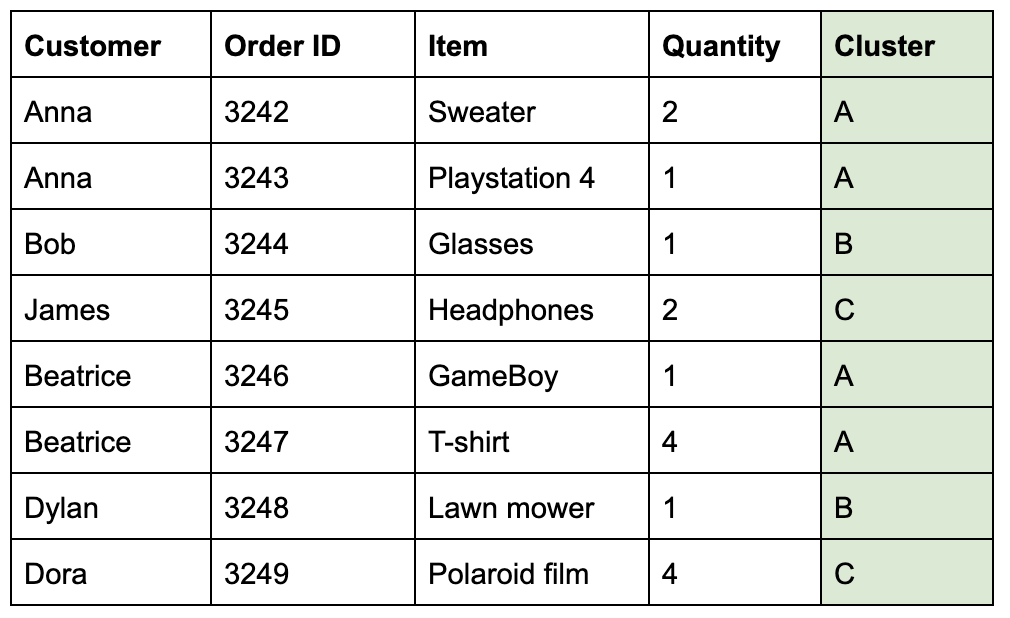
</div>

Now you can go to the Head of Marketing and tell them, so that they can create three different campaigns (one for each cluster):
- (A) Fashionable Geeks - customers who buy gaming tech and clothes
- (B) Pragmatists - customers who buy products that solve a concrete problem
- (C) Audio-Video aficionados - customers who are into high-tech gadgets

### Business use cases of cluster analysis

Clustering is used whenever we need to segment our customers, users, partners, or products, in order to better understand their inner structure:

- Create marketing personas. Find a manageable number of segments (3 - 5 is usually ideal) which represent your customer personas.

- Segment churned users based on reason for churning. Cluster your churned users to identify the most common reasons for churning.

- ...

## Cluster analysis algorithms

Clustering analysis is an umbrella term that encompasses a myriad of clustering algorithms, all of which solve unsupervised classification tasks. There are multiple clustering algorithms based on the statistic method used to classify examples:

- Partitioning models (K-means)
- Connectivity models or Agglomerative models (hierarchical clustering)
- Density models (DBSCAN or OPTICS)
- Graph-based models (HCS clustering)
- Fuzzy clustering models
- Dimensionality reduction models (Principal Component Analysis, Factor Analysis)

Here, we will take a deeper look at one of the most popular clustering algorithms: K-means.

### K-means algorithm

K-means is an elegant algorithm used for partitioning the dataset into K distinct and non-overlapping clusters.

K-means assigns each point to a cluster at random. It then computes the distances between the cluster’s centroids (centers) and other data points. If a point is closer to another cluster’s centroid than the one it belongs to, it gets reassigned.

The pseudocode for K-means is as follows:

    1. Decide on the number of clusters, k, that the model needs to find.

    2. Randomly assign each point to a cluster from 1 to k.

    3. Iterate until the data points no longer change clusters:

    a) For each cluster (1 to k), compute its centroid. 

    The centroid is the central point between all points of the same cluster.

    b) Reassign each data point to the cluster that is closest to it.

    i) Closeness is defined using Euclidean distance.



<div>
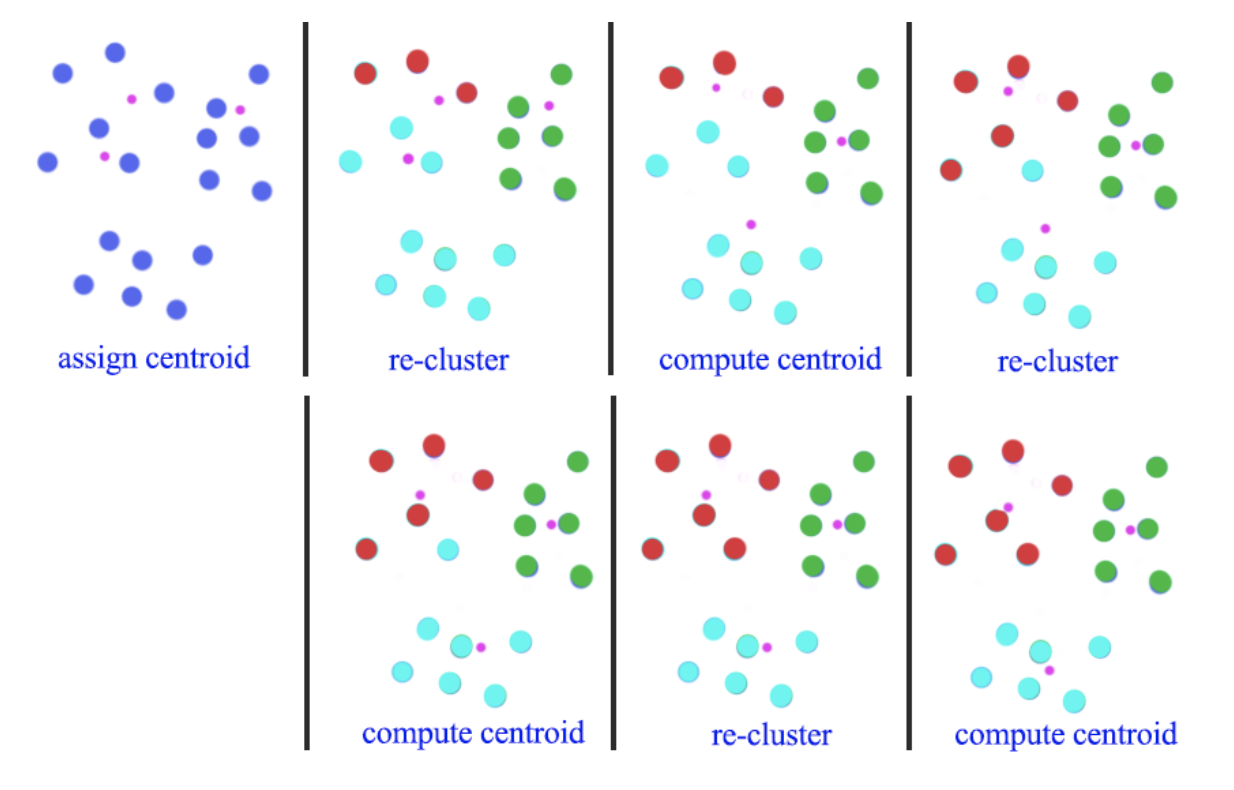
</div>

## Clustering evaluation

There are, two main methods for evaluating the success of our K-means solution:

- The Elbow method
- Silhouette analysis

### The Elbow method

The Elbow method is used to determine the optimal number of clusters. Sometimes, the ideal number of groups is imposed by our business constraints (e.g. we need to find exactly three customer personas because that is the maximum that we can handle in our campaigns). 

But if we want to discover the optimal number of groups, the Elbow method can assist us.

How does it work?

1. Compute the Sum of Squared Distance (SSE) between data points and the centroids of their assigned clusters for different values of k.
2. Visualize the data on a graph, where the x-axis represents the number of clusters (k) and the y-axis shows the SSE for each cluster number.
3. The ‘elbow’ is the point of inflection at which SSE does not (significantly) increase anymore, even when you add additional clusters. The last point of inflection is the optimal number of clusters.

Example:

<div>
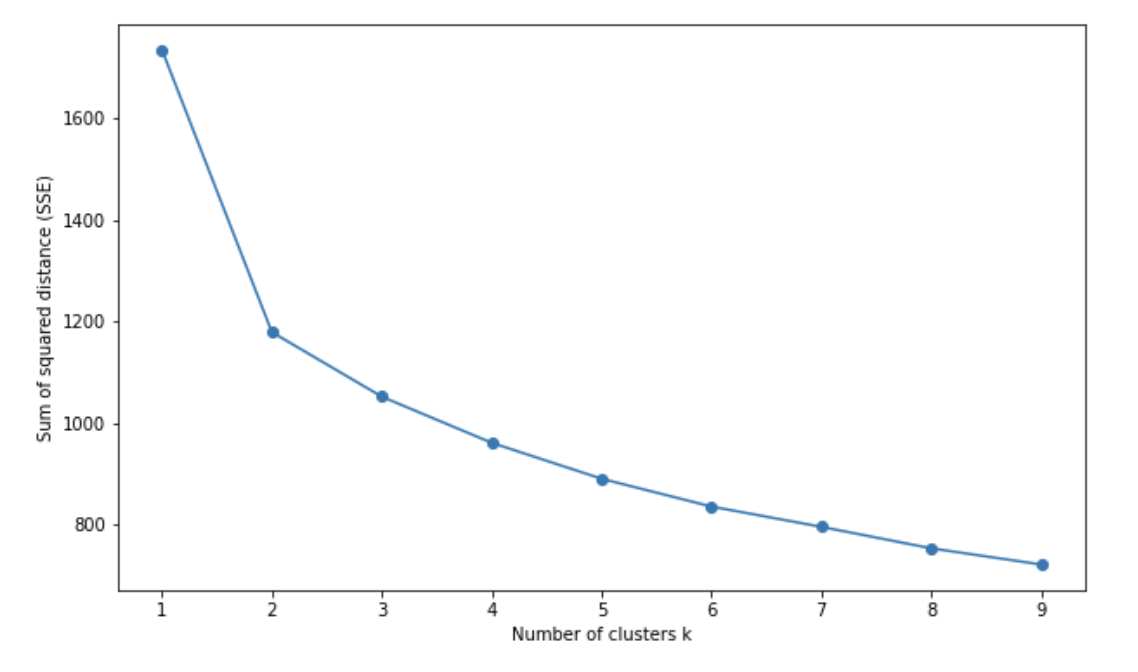
</div>

### Silhouette analysis

The Silhouette method assesses how well each point lies within each cluster. In other words, it determines whether the similarity of within-cluster points is stronger than the similarity of out-cluster points. 

How does it work?

1. For each point $i$ within the cluster $C$, compute its average distance to every other point within the same cluster. Let’s call this “distance $a(i)$”. This distance measures how well a point is assigned to its cluster: the lower the distance, the more homogenous the cluster.

2. For each point i within cluster $C$, compute the average distance to every other point which is not in cluster $C$. Let’s call this “distance $b(i)$”. This distance measures dissimilarity: how different is point i from the points of other clusters?

3. The silhouette $s$ for each data point $i$ is compute as: $s(i) = \frac{b(i) - a(i)}{max(a(i), b(i))}$

How do we interpret this?

1. Values of $s(i)$ close to 1 mean that the data point is far away from neighboring clusters and usually well-clustered.

2. Values of $s(i)$ close to 0 mean that the data point is close to neighboring clusters and we could improve clustering.

3. Values of $s(i)$ close to -1 mean that the data point is assigned to the wrong cluster and we should redo our clustering analysis.

Silhouette analysis can also be viewed as a measure of how separated clusters are. Are they strongly distinct, or are they partially or significantly overlapping?

---------------

# Practice

## Problem Description: Segment travel reviews

You are given a dataset of travel reviews from TripAdvisor.com. The reviews are classified into 10 categories for each reviewer who traveled through East Asia and gave feedback on one of the 10 categories. For each traveler you get their average score for that specific category: Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0). Your task is to discover whether you can classify travelers into distinct clusters using the K-means algorithm.

The dataset can be [found here](https://archive.ics.uci.edu/ml/datasets/Travel+Reviews).
</br>

### Attribute Information

User ID : Unique user id</br>
Category 1 : Average user feedback on art galleries</br>
Category 2 : Average user feedback on dance clubs</br>
Category 3 : Average user feedback on juice bars</br>
Category 4 : Average user feedback on restaurants</br>
Category 5 : Average user feedback on museums</br>
Category 6 : Average user feedback on resorts</br>
Category 7 : Average user feedback on parks/picnic spots</br>
Category 8 : Average user feedback on beaches</br>
Category 9 : Average user feedback on theaters</br>
Category 10 : Average user feedback on religious institutions</br>

### STEP 1: Load & inspect data

In [1]:
import pandas as pd

data_path = 'tripadvisor_review.csv'

# Write code to read data into a dataframe
df = pd.read_csv(data_path)

# write code to check the first 5 rows to get a feeling of the data
df.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


### STEP 2: Exploratory Data Analysis (EDA) & Data Cleaning

Inspect and visualize the data to notice trends.

Let us start by looking at descriptive statistics.

In [3]:
# Write code to get descriptive statistics for each column/feature

df.describe(include='all')

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
unique,980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,User 120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,NaN,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,NaN,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,NaN,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,NaN,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,NaN,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000


The information above is useful to understand the top down statistics of data (e.g. mean, median, standard deviation), but this works even better, if we visualize the data.

Before we visualize it, though, let us clean it a bit.

Check if there are any **missing values** within the dataframe.

In [4]:
# Write code to count the number of rows with missing values per column

df.isna().sum()

User ID        0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

All good! No information is missing, so we do not have to remove anything at this moment.

For the next step, we check data distribution, and whether there are any **outliers**. We do it by visualizing the data with box plots.

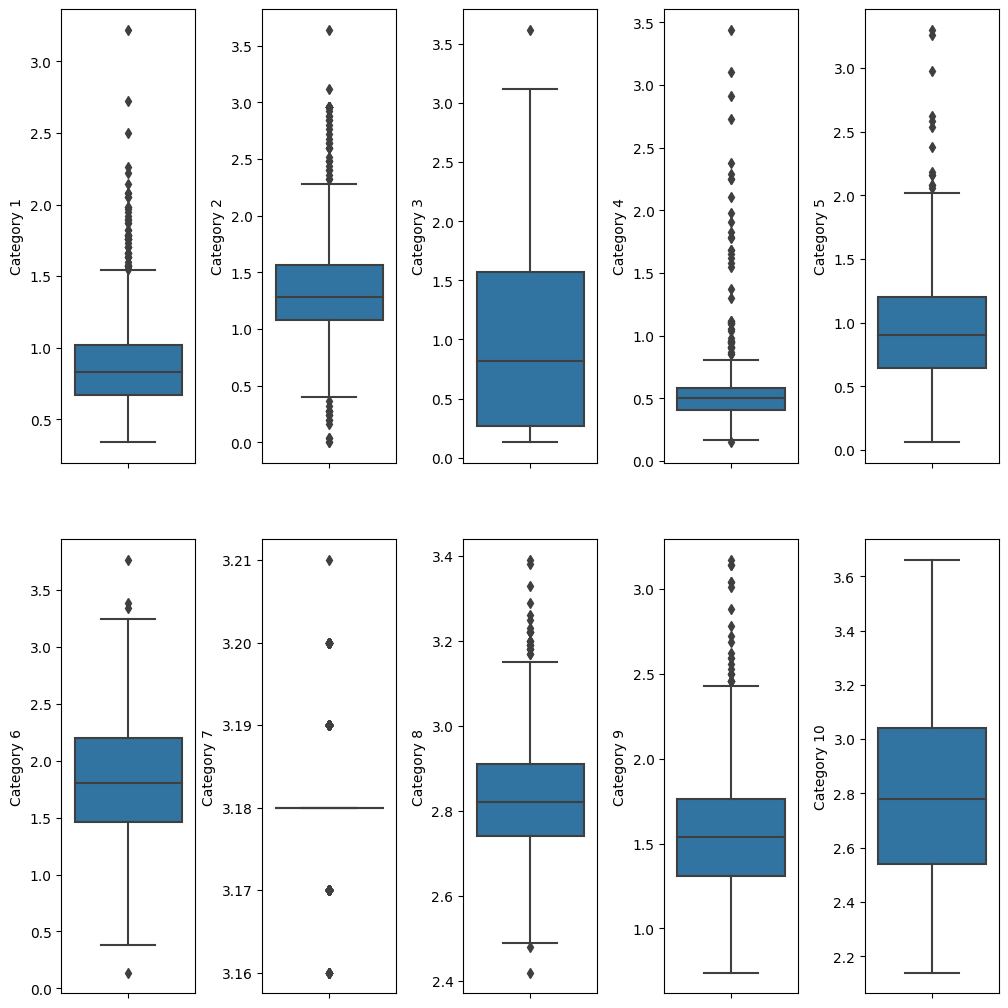

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# prepare a dataframe without the column 'User ID' since it is categorical and cannot be visualized
data_without_user_id = df.drop(['User ID'], axis=1)   # Write code to drop column 'User ID'
data_without_user_id.head()

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10, 10))
index = 0
axs = axs.flatten()
for k,v in data_without_user_id.items():
    sns.boxplot(y=k, data=data_without_user_id, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

From the Box plot we can see that almost every feature has outliers. Which can be extremely problematic for K-means. This is especially the case for the features 'Category 4' (Average user feedback on restaurants) and 'Category 7' (Average user feedback on parks/picnic spots).

There are three options with outliers and K-means:
1. We remove the users whose ratings are outliers.
2. We remove the features which suffer from outliers.
3. We use K-medoids clustering, instead of the K-means algorithm.

For the time being, we will leave the data as it is. You can revisit this issue later and improve upon the algorithm.

In [10]:
df_cat4_remove_out = data_without_user_id[data_without_user_id['Category 4'] < 1.0]

In [11]:
df_cat4_remove_out.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


### STEP 3: Train and evaluate a K-means solution

We start by using the Elbow method to determine the optimal number of clusters.

Text(0, 0.5, 'Sum of squared distance (SSE)')

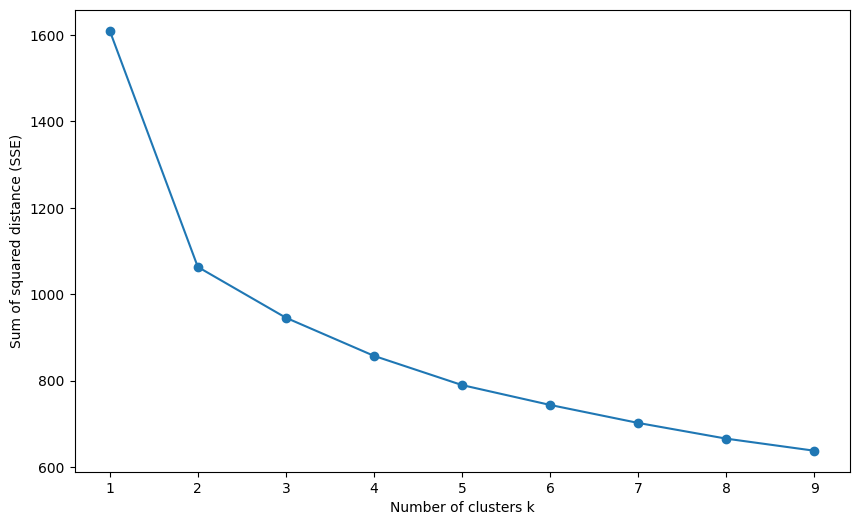

In [12]:
from sklearn.cluster import KMeans

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_cat4_remove_out)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(10, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance (SSE)')

The Elbow method is subjective. But it seems the biggest decrease in SSE happened going from 1 cluster to 2. So k=2 is where the eblow is and that is the ideal number of clusters.

Let us evaluate how good this solution is with the Silhouette analysis. We will compare the solution found via the elbow method to k=3 and k=4.

In [13]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_cat4_remove_out)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_cat4_remove_out, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3108143892403095
For n_clusters = 3 The average silhouette_score is : 0.21508443245966996
For n_clusters = 4 The average silhouette_score is : 0.1702431743764756


**Interpretation**: </br>
Both the elbow method and the silhouette analysis agree: 2 is the ideal number of clusters for segmenting reviewers.

However, it is clear from the silhouette score, that this clustering analysis has a lot of room for improvement.

# Your turn
Improve the model, to perform better than the baseline above.

A couple of things you can explore:
1. Does the model performance improve once we remove outliers?
2. How does feature normalization affect model performance?
3. What other features could you construct to improve the model?